In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

In [2]:
DB2P8 = pd.read_csv("data/DB2P8.csv")
DB5 = pd.read_csv("data/DB5.csv")

DB2P8 = DB2P8[DB5.columns]

# How was this chosen? Is this a form of removing outliers or noise to the new regression?
# Why not simply use the whole DB5?
new_ids = pd.read_csv("data/new_point_ids.csv")

data = pd.read_csv("data/data.csv")
                  
R = pd.read_csv("data/R.csv")#DB5[DB5.id.isin(new_ids.id.values)] #reintroduce dataset

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

baselie = pd.read_csv("data/baseline_regression_values.csv")

In [3]:
## Getting Baseline Regression for DB2

Y = DB2[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = DB2[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()


regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5744.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:37:36   Log-Likelihood:                 573.62
No. Observations:                1310   AIC:                            -1129.
Df Residuals:                    1301   BIC:                            -1083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0043      0.048    -62.399      0.000      -3.099      -2.910
x1             0.7812      0.025     31.009      0.000       0.732       0.831
x2             0.3201      0.027     11.790      0.000       0.267       0.373
x3             0.4352      0.020     22.232      0.000       0.397       0.474
x4            -0.6682      0.013    -51.720      0.000      -0.694      -0.643
x5             2.2230      0.049     44.971      0.000       2.126       2.320
x6             0.3901      0.040      9.730      0.000       0.311       0.469
x7             0.5756      0.050     11.452      0.000       0.477       0.674
x8             0.1798      0.030      6.042      0.000       0.121       0.238
==============================================================================
Omnibus:                       37.273   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.956
Skew:                          -0.252   Prob(JB):                     1.58e-13
Kurtosis:                       3.909   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
regression.params[5]

2.22296166452915

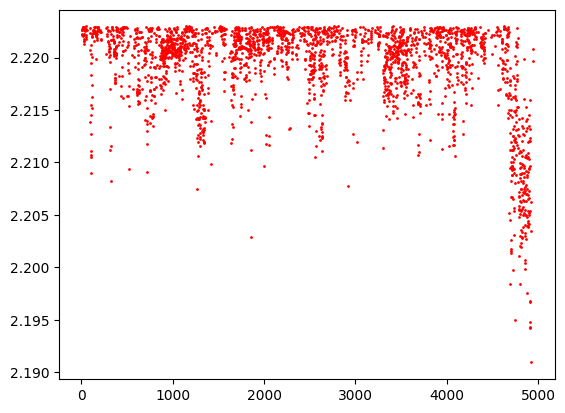

In [5]:
# Leave the ones above baseline out -- because we are interested in the reduction of value
pts_minimize = data[data.αR < regression.params[5] ]
pts_minimize = pts_minimize.sort_values("αR", ascending=True)

plt.scatter(pts_minimize.ind, pts_minimize.αR, s=1, c="r");

In [6]:
pts_minimize

,TOK_added,DATE_added,SHOT_added,TIME_added,α0,αI,αB,αn,αP,αR,αk,αe,αM,id_added,ind
4916,START,19980303,36080,0.043,0.051663,0.792360,0.303846,0.426743,-0.667195,2.19092,0.379690,0.570527,0.182227,AEWB71,4917
4912,START,19971111,34882,0.041,0.051243,0.790704,0.305245,0.427913,-0.665620,2.19423,0.379033,0.569247,0.181412,UAAXGA,4913
4911,START,19971111,34877,0.041,0.051248,0.790514,0.305470,0.427923,-0.665611,2.19431,0.379264,0.569610,0.181405,53LSPJ,4912
4914,START,19980303,36078,0.042,0.051217,0.790618,0.305768,0.427929,-0.665882,2.19474,0.379609,0.569316,0.181426,FLO8WI,4915
4749,NSTX,20040427,112453,0.360,0.051531,0.792834,0.299394,0.429275,-0.665955,2.19494,0.373501,0.570557,0.182654,TKCDLW,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,JETILW,20160902,91752,46.300,0.049507,0.780981,0.320311,0.435320,-0.668702,2.22296,0.390257,0.575847,0.182751,K3O76W,2812
2765,JETILW,20160816,91479,50.000,0.049367,0.780211,0.323407,0.434725,-0.669495,2.22296,0.392433,0.576414,0.186584,ZD6MZS,2766
1174,AUGW,20120619,28196,3.250,0.049593,0.781520,0.319668,0.435144,-0.668432,2.22296,0.389753,0.575329,0.179849,ZPPYT0,1175
1515,JET,19970930,42762,53.370,0.049841,0.780763,0.319443,0.435022,-0.669238,2.22296,0.392193,0.578453,0.178395,Q48F9L,1516


In [7]:
ids = pts_minimize.id_added.values

# Analysis for the Complete Decreased Dataset

In [8]:
# Getting both DataFrames together: points that decreased the regression

R = R[R.id.isin(ids)]
R_dec = R[["TAUTH"] + coeffs + ["id"]] 

decreased_data = pd.concat([DB2, R_dec], axis=0, ignore_index=True)
decreased_data

Y = decreased_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = decreased_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()


regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     7863.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:37:37   Log-Likelihood:                 645.21
No. Observations:                3854   AIC:                            -1272.
Df Residuals:                    3845   BIC:                            -1216.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3768      0.033    -71.522      0.000      -2.442      -2.312
x1             1.2642      0.020     63.580      0.000       1.225       1.303
x2             0.0818      0.017      4.845      0.000       0.049       0.115
x3             0.0095      0.012      0.771      0.441      -0.015       0.034
x4            -0.6264      0.010    -63.072      0.000      -0.646      -0.607
x5             1.0538      0.032     33.370      0.000       0.992       1.116
x6             0.2168      0.033      6.487      0.000       0.151       0.282
x7            -0.2248      0.043     -5.169      0.000      -0.310      -0.140
x8             0.1628      0.024      6.846      0.000       0.116       0.209
==============================================================================
Omnibus:                       12.914   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.238
Skew:                          -0.034   Prob(JB):                     0.000298
Kurtosis:                       3.311   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Getting both DataFrames together: points that increased the regression

R = R[~R.id.isin(ids)]
R_inc = R[["TAUTH"] + coeffs + ["id"]] 

increased_data = pd.concat([DB2, R_inc], axis=0, ignore_index=True)
increased_data

Y_inc = increased_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = increased_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X_inc = x_df.to_numpy()

n_inc, p_inc = X_inc.shape

model_inc = sm.OLS(Y_inc,X_inc)
regression_inc = model_inc.fit()


regression_inc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5744.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:37:37   Log-Likelihood:                 573.62
No. Observations:                1310   AIC:                            -1129.
Df Residuals:                    1301   BIC:                            -1083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0043      0.048    -62.399      0.000      -3.099      -2.910
x1             0.7812      0.025     31.009      0.000       0.732       0.831
x2             0.3201      0.027     11.790      0.000       0.267       0.373
x3             0.4352      0.020     22.232      0.000       0.397       0.474
x4            -0.6682      0.013    -51.720      0.000      -0.694      -0.643
x5             2.2230      0.049     44.971      0.000       2.126       2.320
x6             0.3901      0.040      9.730      0.000       0.311       0.469
x7             0.5756      0.050     11.452      0.000       0.477       0.674
x8             0.1798      0.030      6.042      0.000       0.121       0.238
==============================================================================
Omnibus:                       37.273   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.956
Skew:                          -0.252   Prob(JB):                     1.58e-13
Kurtosis:                       3.909   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying the Influential Analysis to the set of points that decreased the parameter $\alpha_R$


#### General Influential Points

High Residual and High Leverage

In [10]:
influence = regression.get_influence()
infl_summary = influence.summary_frame()

In [11]:
infl_summary

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.023383,-0.031287,0.019235,0.009353,0.004175,0.021861,-0.015915,0.025323,-0.008067,0.000602,1.564789,0.002208,0.073611,1.565084,0.073625
1,0.025290,-0.034309,0.020882,0.006137,0.011465,0.020408,-0.018741,0.026356,-0.008708,0.000713,1.671703,0.002290,0.080089,1.672093,0.080108
2,0.021399,-0.017396,0.016653,0.009510,-0.020033,0.021190,-0.002785,0.020244,-0.004986,0.000301,1.071003,0.002354,0.052019,1.071024,0.052020
3,0.040113,-0.043473,0.032882,0.026517,-0.026357,0.045654,-0.012828,0.045286,-0.011118,0.001235,2.171820,0.002351,0.105428,2.172871,0.105479
4,0.029475,-0.042387,0.025084,0.011248,0.012165,0.027024,-0.021970,0.033389,-0.010398,0.000999,1.950803,0.002357,0.094822,1.951515,0.094857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,-0.137184,-0.133780,0.091512,0.077991,0.049834,0.147087,0.070771,0.062047,0.004999,0.012825,-3.263462,0.010721,-0.339737,-3.267566,-0.340164
3850,-0.134404,-0.183478,0.160167,0.045666,0.019796,0.185109,0.165531,0.097161,0.008307,0.016626,-3.652084,0.011094,-0.386822,-3.657959,-0.387444
3851,-0.141803,-0.211703,0.204330,0.097154,-0.071492,0.252845,0.237194,0.137396,-0.000752,0.022274,-4.092298,0.011829,-0.447732,-4.100705,-0.448652
3852,0.052732,-0.051111,0.068391,0.000983,-0.007322,0.042220,0.000618,0.067048,0.009702,0.000932,1.083804,0.007091,0.091590,1.083829,0.091592


In [12]:
student_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cutoff_leverage = ((2*p)+2)/n
cutoff_student_resid = 1

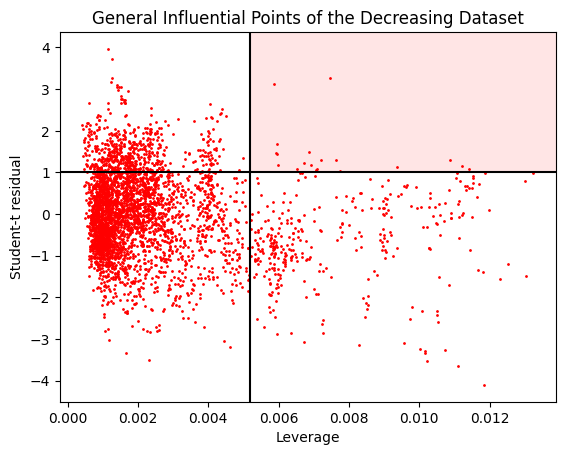

In [13]:
plt.scatter(leverage, student_resid, s=1, c="r")
plt.ylabel("Student-t residual")
plt.xlabel("Leverage")
plt.axvline(cutoff_leverage, c="k")
plt.axhline(cutoff_student_resid, c="k")

left, bottom, width, height = cutoff_leverage, cutoff_student_resid, max(leverage), max(student_resid)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)
plt.title("General Influential Points of the Decreasing Dataset");

In [14]:
ge_infl = (pd.DataFrame([leverage,student_resid]).T).rename(columns={0:"leverage",1:"t_resid"})
ge_infl = ge_infl[ge_infl.leverage > cutoff_leverage]
ge_infl = ge_infl[ge_infl.t_resid  > cutoff_student_resid]
gen_infl_pts = list(ge_infl.index)

print(
    f"Influence of DB2: {round((len(np.where(np.array(gen_infl_pts) < len(DB2))[0])/len(gen_infl_pts))*100,2)}%"+
    "\n"+
    f"Influence of DB5: {round((len(np.where(np.array(gen_infl_pts) > len(DB2))[0])/len(gen_infl_pts))*100,2)}%"+
    "\n"+
    f"Total number of points: {len(gen_infl_pts)}"
)

Influence of DB2: 63.16%
Influence of DB5: 36.84%
Total number of points: 19


In [15]:
# Getting both DataFrames together: influential

R_infl =  R_dec[R_dec.id.isin(gen_infl_pts)]

infl_data = pd.concat([DB2, R_infl], axis=0, ignore_index=True)
infl_data

Y = infl_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = infl_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5744.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:37:58   Log-Likelihood:                 573.62
No. Observations:                1310   AIC:                            -1129.
Df Residuals:                    1301   BIC:                            -1083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0043      0.048    -62.399      0.000      -3.099      -2.910
x1             0.7812      0.025     31.009      0.000       0.732       0.831
x2             0.3201      0.027     11.790      0.000       0.267       0.373
x3             0.4352      0.020     22.232      0.000       0.397       0.474
x4            -0.6682      0.013    -51.720      0.000      -0.694      -0.643
x5             2.2230      0.049     44.971      0.000       2.126       2.320
x6             0.3901      0.040      9.730      0.000       0.311       0.469
x7             0.5756      0.050     11.452      0.000       0.477       0.674
x8             0.1798      0.030      6.042      0.000       0.121       0.238
==============================================================================
Omnibus:                       37.273   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.956
Skew:                          -0.252   Prob(JB):                     1.58e-13
Kurtosis:                       3.909   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Getting both DataFrames together: not influential

R_infl =  R_dec[~R_dec.id.isin(gen_infl_pts)]

infl_data = pd.concat([DB2, R_infl], axis=0, ignore_index=True)
infl_data

Y = infl_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = infl_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     7863.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:37:58   Log-Likelihood:                 645.21
No. Observations:                3854   AIC:                            -1272.
Df Residuals:                    3845   BIC:                            -1216.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3768      0.033    -71.522      0.000      -2.442      -2.312
x1             1.2642      0.020     63.580      0.000       1.225       1.303
x2             0.0818      0.017      4.845      0.000       0.049       0.115
x3             0.0095      0.012      0.771      0.441      -0.015       0.034
x4            -0.6264      0.010    -63.072      0.000      -0.646      -0.607
x5             1.0538      0.032     33.370      0.000       0.992       1.116
x6             0.2168      0.033      6.487      0.000       0.151       0.282
x7            -0.2248      0.043     -5.169      0.000      -0.310      -0.140
x8             0.1628      0.024      6.846      0.000       0.116       0.209
==============================================================================
Omnibus:                       12.914   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.238
Skew:                          -0.034   Prob(JB):                     0.000298
Kurtosis:                       3.311   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
len(R_infl)

2544

# Analysis for the Partial Decreased Dataset

In [18]:
# Ordering R_dec dataset

dict_ordered_vals = dict(zip( ids, list(range(len(pts_minimize)))  ) )

R_dec["ordered"] = R_dec.id.map(dict_ordered_vals)
R_dec = R_dec.sort_values("ordered")
R_dec = R_dec.set_index("ordered")

In [19]:
def compute_reg_aR(reg_data):
    """
    reg_data: DataFrame with y and X data
    """
    Y_ = reg_data[["TAUTH"]]
    X_ = reg_data[coeffs]
    X_.insert(loc = 0, column = "intercept", value = np.ones(len(X_)))

    model_ = sm.OLS(Y_,X_)
    regression_ = model_.fit()
    
    return regression_.params[5]


reg_coeff_per_pts = np.zeros(len(pts_minimize))

for i in range(1, len(pts_minimize) + 1):
    df1 = DB2[["TAUTH"] + coeffs]
    df2 = (R_dec.iloc[:i][["TAUTH"] + coeffs])
    reg_data = pd.concat([df1, df2], axis=0, ignore_index=True)
    reg_coeff_per_pts[i-1] = compute_reg_aR(reg_data)

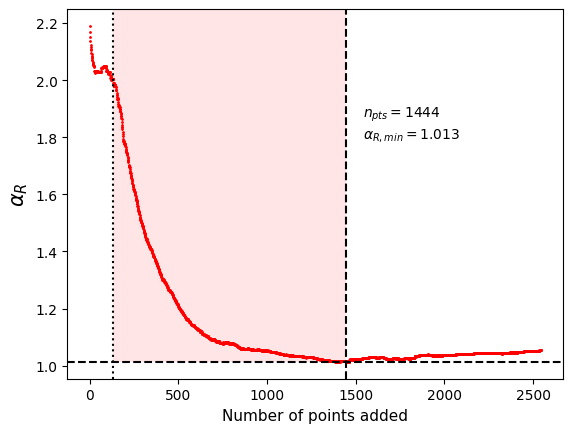

In [20]:
num_pts_add = list(range(1,len(pts_minimize) + 1))

#%matplotlib notebook

plt.scatter(num_pts_add, reg_coeff_per_pts, s=1, c = "r")
plt.xlabel("Number of points added", fontsize=11)
plt.ylabel("$\\alpha_R$", fontsize=15)

plt.axvline(x = np.argmin(reg_coeff_per_pts) + 1, c="k", ls="--");
plt.axhline(y = np.min(reg_coeff_per_pts), c="k", ls="--");
plt.axvline(x = 130, c="k", ls=":")
plt.text(x=1543, y=1.8,
         s=("$n_{pts} = $"+f"{np.argmin(reg_coeff_per_pts) + 1}"+
            "\n$\\alpha_{R,min} = $"+
            f"{round(np.min(reg_coeff_per_pts),3)}")
        )

left, bottom, width, height = (130, 
                               np.min(reg_coeff_per_pts), 
                               np.argmin(reg_coeff_per_pts) - 130, 
                               max(reg_coeff_per_pts))
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect);

### Applying Analysis of Influential Pts to the selected range 

In [21]:
range_of_analysis = list(range(130, np.argmin(reg_coeff_per_pts)+1))
R_range = R_dec[R_dec.index.isin(range_of_analysis)]
R_range = (R_range[["TAUTH"] + coeffs + ["id"]]).reset_index(drop=True)

ranged_data = pd.concat([DB2[["TAUTH"] + coeffs], R_range[["TAUTH"] + coeffs]], axis=0, ignore_index=True)
ranged_data

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465
...,...,...,...,...,...,...,...,...,...
2619,-2.515160,-0.002403,0.881285,2.079567,1.585145,0.484892,0.452349,-1.144025,0.693147
2620,-1.630699,0.320049,0.540393,1.378917,2.168919,1.066912,0.418318,-1.146205,0.686573
2621,-1.350480,0.909436,1.018471,1.828925,2.779612,1.066145,0.428949,-1.134850,0.660323
2622,-1.086920,0.395632,0.426818,0.616920,0.782844,1.058404,0.413119,-1.077857,0.721413


In [22]:
Y_range = ranged_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = ranged_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X_range = x_df.to_numpy()

n_rng, p_rng = X_range.shape

model_range = sm.OLS(Y_range,X_range)
regression_range = model_range.fit()


regression_range.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5172.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:38:11   Log-Likelihood:                 360.68
No. Observations:                2624   AIC:                            -703.4
Df Residuals:                    2615   BIC:                            -650.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2896      0.040    -57.602      0.000      -2.368      -2.212
x1             1.2643      0.024     53.480      0.000       1.218       1.311
x2             0.1442      0.021      6.973      0.000       0.104       0.185
x3            -0.0625      0.015     -4.235      0.000      -0.091      -0.034
x4            -0.6013      0.012    -49.113      0.000      -0.625      -0.577
x5             0.9624      0.037     25.939      0.000       0.890       1.035
x6             0.2452      0.039      6.253      0.000       0.168       0.322
x7            -0.2578      0.050     -5.147      0.000      -0.356      -0.160
x8             0.0974      0.031      3.173      0.002       0.037       0.158
==============================================================================
Omnibus:                        0.618   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.676
Skew:                           0.018   Prob(JB):                        0.713
Kurtosis:                       2.930   Cond. No.                         53.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gemeral analysis of influential points for the ranged-decreased dataset.

In [23]:
influence_ranged = regression_range.get_influence()
infl_summary_range = influence_ranged.summary_frame()

infl_summary_range

,dfb_const,dfb_x1,dfb_x2,dfb_x3,dfb_x4,dfb_x5,dfb_x6,dfb_x7,dfb_x8,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.018920,-0.031617,0.020971,0.007378,0.004821,0.022276,-0.006729,0.025410,-0.009105,0.000519,1.387352,0.002423,0.068367,1.387597,0.068379
1,0.020448,-0.034540,0.022388,0.003694,0.012512,0.020457,-0.008785,0.026137,-0.010025,0.000614,1.475811,0.002531,0.074338,1.476144,0.074354
2,0.018185,-0.017625,0.018314,0.008655,-0.020560,0.022065,0.003547,0.020859,-0.004585,0.000259,0.927816,0.002700,0.048275,0.927791,0.048274
3,0.035078,-0.045877,0.037548,0.025812,-0.028625,0.049379,0.000392,0.048297,-0.011674,0.001179,2.011499,0.002616,0.103009,2.012672,0.103069
4,0.024060,-0.043318,0.027228,0.008572,0.013634,0.027493,-0.010455,0.033628,-0.012143,0.000895,1.757497,0.002602,0.089770,1.758199,0.089806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,0.001050,0.012596,-0.017026,-0.012990,0.009202,-0.009170,-0.014601,-0.013123,-0.003639,0.000123,-0.978130,0.001155,-0.033264,-0.978122,-0.033264
2620,-0.000368,-0.004597,-0.000804,0.000482,0.001757,0.006129,0.001118,0.003224,0.001617,0.000020,0.354898,0.001440,0.013477,0.354839,0.013475
2621,0.000308,-0.002136,0.001268,0.000412,-0.004671,0.001442,0.003346,0.001774,0.002501,0.000014,-0.284471,0.001525,-0.011118,-0.284421,-0.011116
2622,-0.042043,-0.011878,-0.009683,0.022451,0.082456,-0.033335,-0.024756,-0.019734,-0.024347,0.001638,-1.509279,0.006429,-0.121402,-1.509648,-0.121432


In [82]:
student_resid_rng = influence_ranged.resid_studentized_external
leverage_rng = influence_ranged.hat_matrix_diag
cutoff_leverage_rng = ((2*p_rng)+2)/n_rng
cutoff_student_resid_rng = 0.25

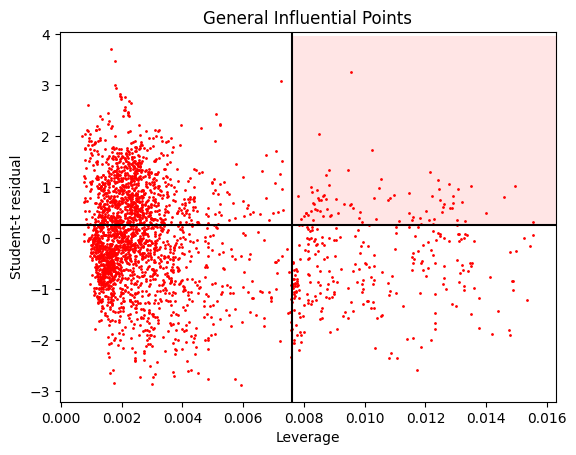

In [83]:
plt.scatter(leverage_rng, student_resid_rng, s=1, c="r")
plt.ylabel("Student-t residual")
plt.xlabel("Leverage")
plt.axvline(cutoff_leverage_rng, c="k")
plt.axhline(cutoff_student_resid_rng, c="k")

left, bottom, width, height = (cutoff_leverage_rng,
                               cutoff_student_resid_rng,
                               max(leverage_rng), 
                               max(student_resid_rng)
                              )
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)
plt.title("General Influential Points");

In [84]:
ge_infl_rng = (pd.DataFrame([leverage_rng,student_resid_rng]).T).rename(columns={0:"leverage",1:"t_resid"})
ge_infl_rng = ge_infl_rng[ge_infl_rng.leverage > cutoff_leverage_rng]
ge_infl_rng = ge_infl_rng[ge_infl_rng.t_resid  > cutoff_student_resid_rng]
gen_infl_pts_rng = list(ge_infl_rng.index)

In [85]:
print(
    f"Influence of DB2: {round((len(np.where(np.array(gen_infl_pts_rng) < len(DB2))[0])/len(gen_infl_pts_rng))*100,2)}%"+
    "\n"+
    f"Influence of DB5: {round((len(np.where(np.array(gen_infl_pts_rng) > len(DB2))[0])/len(gen_infl_pts_rng))*100,2)}%"
)

Influence of DB2: 56.98%
Influence of DB5: 41.86%


In [86]:
# Getting both DataFrames together: influential | for high alpha_R

R_infl =  R_range[R_range.index.isin(gen_infl_pts_rng)]

infl_data = pd.concat([DB2, R_infl], axis=0, ignore_index=True)
infl_data

Y = infl_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = infl_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     5276.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:45:17   Log-Likelihood:                 523.69
No. Observations:                1361   AIC:                            -1029.
Df Residuals:                    1352   BIC:                            -982.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9003      0.048    -60.508      0.000      -2.994      -2.806
x1             0.8279      0.026     32.050      0.000       0.777       0.879
x2             0.2977      0.027     10.995      0.000       0.245       0.351
x3             0.3719      0.020     19.023      0.000       0.334       0.410
x4            -0.6580      0.013    -49.530      0.000      -0.684      -0.632
x5             2.0614      0.049     41.780      0.000       1.965       2.158
x6             0.3727      0.041      9.058      0.000       0.292       0.453
x7             0.4992      0.052      9.592      0.000       0.397       0.601
x8             0.1966      0.031      6.398      0.000       0.136       0.257
==============================================================================
Omnibus:                       29.330   Durbin-Watson:                   0.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.753
Skew:                          -0.243   Prob(JB):                     2.33e-09
Kurtosis:                       3.681   Cond. No.                         49.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# Getting both DataFrames together: not influential | For low alpha_R

R_not_infl =  R_range[~R_range.index.isin(gen_infl_pts_rng)]

not_infl_data = pd.concat([DB2, R_not_infl], axis=0, ignore_index=True)


Y = not_infl_data[["TAUTH"]].to_numpy()
# Adding a column for the intercept
x_df = not_infl_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X = x_df.to_numpy()

n, p = X.shape

model = sm.OLS(Y,X)
regression = model.fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     5106.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:45:18   Log-Likelihood:                 351.80
No. Observations:                2573   AIC:                            -685.6
Df Residuals:                    2564   BIC:                            -632.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2777      0.040    -56.921      0.000      -2.356      -2.199
x1             1.2599      0.024     52.890      0.000       1.213       1.307
x2             0.1466      0.021      7.010      0.000       0.106       0.188
x3            -0.0623      0.015     -4.174      0.000      -0.092      -0.033
x4            -0.6016      0.012    -48.596      0.000      -0.626      -0.577
x5             0.9693      0.037     25.849      0.000       0.896       1.043
x6             0.2499      0.040      6.317      0.000       0.172       0.327
x7            -0.2449      0.050     -4.852      0.000      -0.344      -0.146
x8             0.0907      0.031      2.917      0.004       0.030       0.152
==============================================================================
Omnibus:                        0.517   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.577
Skew:                           0.009   Prob(JB):                        0.749
Kurtosis:                       2.929   Cond. No.                         53.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
"""
Results of NOT Influential Points given R

tot_pt 
2623: R_range: 0.9622: cutoff t-res = 2
2623: R_range: 0.9622: cutoff t-res = 1.5
2623: R_range: 0.9627: cutoff t-res = 1.2
2615: R_range: 0.9625: cutoff t-res = 1
2591: R_range: 0.9683: cutoff t-res = 0.5
2573: R_range: 0.9693: cutoff t-res = 0.25
""";